# Análisis de tensiones con SolidsPy

## Introducción

En este notebook se realiza el análisis de tensiones del modelo simple para una placa de 2 materiales definido en el notebook anterior.

**Al completar este notebook usted debería estar en la capacidad de:**

* Ejecutar un análisis completo usando **SolidsPy**.

* Acceder a la base de datos de resultados de **SolidsPy** para realizar cálculos personalizados.


**Nota:** Para poder realizar este notebook es necesario tener instalado SolidsPy y los modulos requeridos (ver documentación en [SolidsPy](https://solidspy.readthedocs.io/en/latest/readme.html)). Adicionalmente se requieren los archivos de texto generados en el notebook anterior.

## Definición del problema.

El problema a resolver consiste en determinar el tensor de tensiones sobre una placa fabricada de 2 materiales (asumiendo condiciones de deformación plana) y con una carga uniformemente distribuida de intensidad $W$ aplicada sobre la cara superior (ver figura).


<center>
    <img src="img/biplate.png"
         alt="files"style="width:500px">
</center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solidspy.preprocesor as msh      # Rutinas de preprocesado
import solidspy.assemutil as ass        # Rutinas de ensamblaje
import solidspy.solutil as sol          # Solucionador de ecuaciones
import solidspy.postprocesor as pos     # Rutinas de postprocesado
import meshio

In [2]:
%matplotlib notebook

Tras importar los paquetes necesarios para la ejecución del análisis estamos listos para leer los archivos de texto que almacenan el modelo. Aunque esto es posible mediante la función `readin` la cual se encuentra disponible en el modulo de pre-procesado de `Solidspy` en este ejemplo la programamos de manera independiente con el fin de tener libertad en los nombres de los archivos. La rutina lee los correspondientes archivos de texto `Mnodes.txt`, `Meles.txt`, `Mloads.txt` y `Mmater.txt` entrega la información como arreglos.

In [3]:
def readin():
    nodes = np.loadtxt('files/Cnodes.txt', ndmin=2)
    mats = np.loadtxt('files/Cmater.txt', ndmin=2)
    elements = np.loadtxt('files/Celes.txt', ndmin=2, dtype=int)
    loads = np.loadtxt('files/Cloads.txt', ndmin=2)
    return nodes, mats, elements, loads

In [4]:
mats

NameError: name 'mats' is not defined

## Ejecución del análisis

Aunque SolidsPy puede ejecutarse en modo automático mediante un solo comando (ver [documentación](https://solidspy.readthedocs.io/en/latest/readme.html)) en este notebook se realiza el análisis paso a paso.

Inicialmente leamos los archivos de texto.

In [5]:
nodes, mats, elements, loads = readin()

In [6]:
mats

array([[1. , 0.3],
       [2. , 0.3]])

Posteriormente se calcula la matriz `DME` que ensambla el sistema global de ecuaciones. Para esto solo es necesaria la información de nodos (incluyendo condiciones de frontera) y de elementos.

In [5]:
DME , IBC , neq = ass.DME(nodes, elements)
DME

array([[2143, 2144, 2589, ...,    0,    0,    0],
       [2589, 2590, 2591, ...,    0,    0,    0],
       [2589, 2590, 2241, ...,    0,    0,    0],
       ...,
       [2141, 2142, 2009, ...,    0,    0,    0],
       [2141, 2142,  695, ...,    0,    0,    0],
       [2019, 2020, 2009, ...,    0,    0,    0]])

La matriz `DME` contiene ahora toda la información necesaria para ensamblar el sistema de ecuaciones globales. El ensamblaje lo realizan las rutinas `assembler()` y `loadasem()`. La primera utiliza como entradas la información de elementos, materiales, nudos y las direcciones de ensamblaje contenidas en la matriz `DME` para calcular la matriz de rigidez global. La segunda rutina utiliza la información de las cargas y forma el vector del lado derecho de la ecuación de equilibrio.

$$
\left[K_G\right]\left\{U_G\right\}=\left\{F_G\right\}
$$

<IPython.core.display.Javascript object>


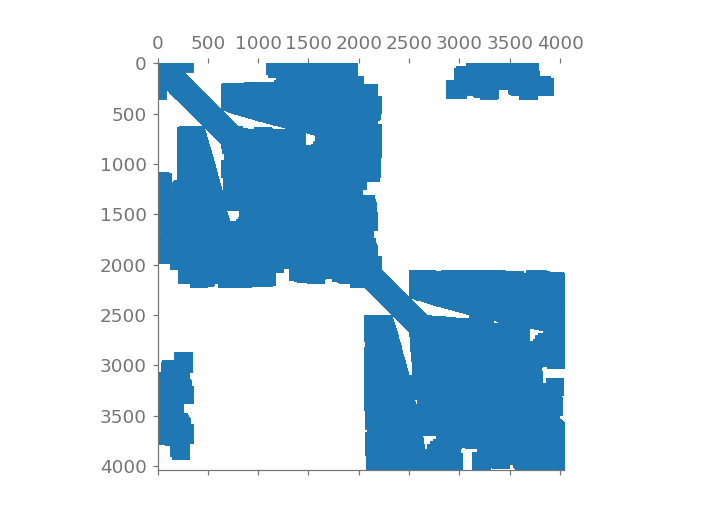

In [6]:
KG   = ass.assembler(elements, mats, nodes, neq, DME)
RHSG = ass.loadasem(loads, IBC, neq)
plt.spy(KG)

En el siguiente paso se determinan los dessplazamientos desconocidos

In [7]:
UG = sol.static_sol(KG, RHSG)

y con estos se forma el vector de desplazmientos completo, denominado $U_C$. Este ahora contiene todos los desplazamietos de todos los nudos de la malla. De esta manera se concluye con la etapa de pre-procesamiento, ensamblaje y solución.

In [8]:
UC = pos.complete_disp(IBC, nodes, UG)

## Post-procesamiento

Durante esta etapa se utiliza la información de desplazamientos nodales con el fin de calcular variables (secundarias) de interés como deformaciones unitarias, tensiones y otras deseadas por el usuario. Por defecto SolidsPy muestra la solución de deformaciones, tensiones y desplazamientos graficamente.

<IPython.core.display.Javascript object>


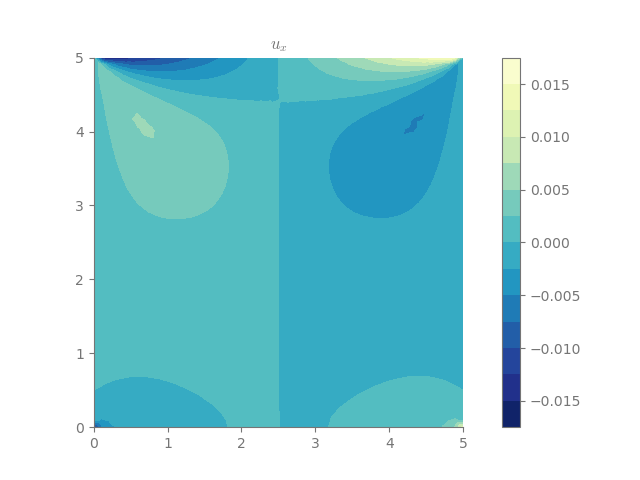

C:\Users\j.gomez\AppData\Roaming\Python\Python39\site-packages\solidspy\postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


<IPython.core.display.Javascript object>


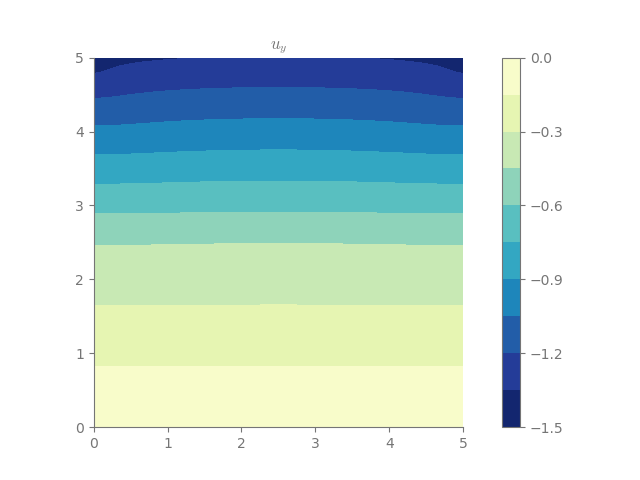

<IPython.core.display.Javascript object>


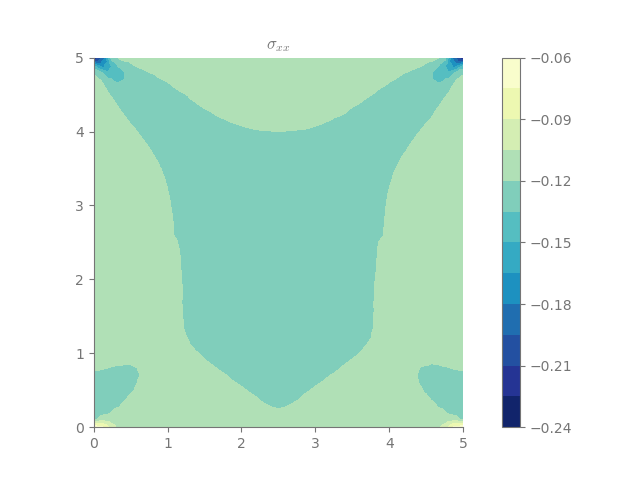

<IPython.core.display.Javascript object>


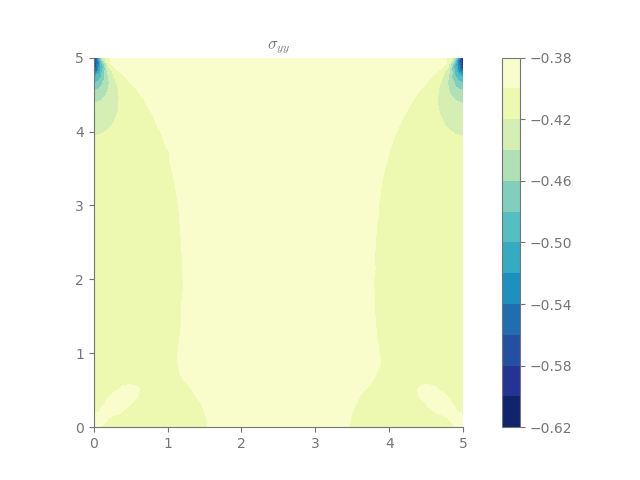

<IPython.core.display.Javascript object>


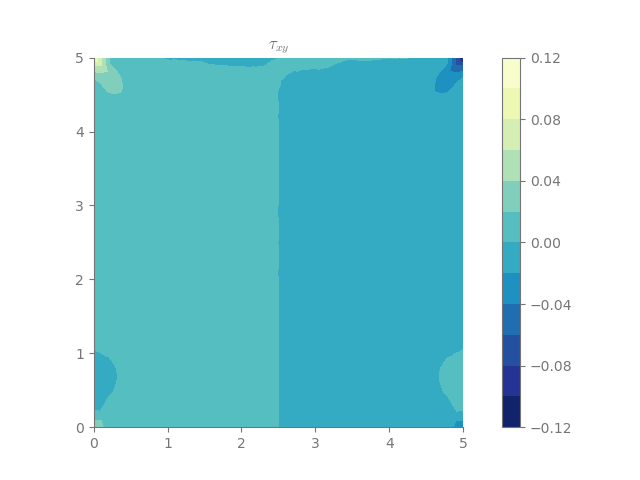

In [9]:
E_nodes, S_nodes = pos.strain_nodes(nodes , elements, mats, UC)
pos.fields_plot(elements, nodes, UC, S_nodes=S_nodes)

Adicionalmente, el programa genera una base de datos con los diferentes resultados de manera que se puedan realizar cálculos posteriores. Por ejemplo el vectore de desplazamientos $U_C$, y los tensores de deformaciones y tensiones $\varepsilon$ y $\sigma$ estan disponibles para calculos posteriores.Estos se imprimen en la siguiente linea.

### Referencias

* Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

## Formato del notebook

La siguiente celda cambia el formato del Notebook.

In [10]:
from IPython.core.display import HTML
def css_styling():
    styles = open('estilo.css', 'r').read()
    return HTML(styles)
css_styling()

In [11]:
np.__version__

'1.21.5'